In [24]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

In [25]:
MOVING_META_DATA_PATH = "track-meta-data.json"
MOVING_AUDIO_FEATURES_PATH = "track-audio-features.json"

In [26]:
CONTROL_META_DATA_PATH = "control-track-meta-data.json"
CONTROL_AUDIO_FEATURES_PATH = "control-track-audio-features.json"

Different Control Group

In [51]:
CONTROL_META_DATA_PATH = "playlist_data/0KLSjRLWqlYcgAc4vuL34C-meta-data.json"
CONTROL_AUDIO_FEATURES_PATH = "playlist_data/0KLSjRLWqlYcgAc4vuL34C-audio-features.json"

In [52]:
with open(MOVING_META_DATA_PATH) as f:
    moving_meta_data = json.load(f)

In [53]:
with open(MOVING_AUDIO_FEATURES_PATH) as f:
    moving_audio_features = json.load(f)

In [54]:
with open(CONTROL_META_DATA_PATH) as f:
    control_meta_data = json.load(f)

In [55]:
with open(CONTROL_AUDIO_FEATURES_PATH) as f:
    control_audio_features = json.load(f)

In [56]:
def get_feature(feature_name, all_features):
    return list(map(lambda x: x[feature_name], all_features))

In [57]:
def get_meta_data(feature_name, meta_data):
    return list(map(lambda x: x[feature_name], meta_data))

In [58]:
moving_feature = {}
for feature in moving_audio_features[0].keys():
    moving_feature[feature] = get_feature(feature, moving_audio_features)

In [59]:
control_feature = {}
for feature in control_audio_features[0].keys():
    control_feature[feature] = get_feature(feature, control_audio_features)

In [60]:
moving_meta = {}
for feature in moving_meta_data[0].keys():
    moving_meta[feature] = get_meta_data(feature, moving_meta_data)

In [61]:
control_meta = {}
for feature in control_meta_data[0].keys():
    control_meta[feature] = get_meta_data(feature, control_meta_data)

In [62]:
def create_comparison_histograms(name, data_source="features"):
    fig, axs = plt.subplots(2, 1)
    if data_source == "features":
        feature1 = moving_feature[name]
        feature2 = control_feature[name]
    elif data_source == "meta":
        feature1 = moving_meta[name]
        feature2 = control_meta[name]
    
    x1_min, x1_max = min(feature1), max(feature1)
    x2_min, x2_max = min(feature2), max(feature2)
    x_min = min(x1_min, x2_min)
    x_max = max(x1_max, x2_max)
    diff = x_max - x_min
    xlim = (x_min - (diff * 0.05), x_max + (diff * 0.05))
    h1 = sns.histplot(feature1, ax=axs[0])
    h2 = sns.histplot(feature2, ax=axs[1], color='r')
    h1.set_xlim(xlim)
    h2.set_xlim(xlim)
    
    h1.set_title(name)
    
    print(ttest_ind(feature1, feature2, equal_var=False))
    print(mannwhitneyu(feature1, feature2))

Ttest_indResult(statistic=4.702580267936049, pvalue=2.6877244490435034e-06)
MannwhitneyuResult(statistic=2911460.0, pvalue=1.659443521242218e-05)


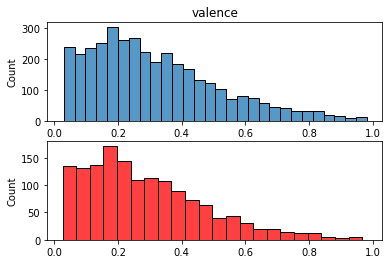

In [63]:
create_comparison_histograms("valence")

Ttest_indResult(statistic=10.568586206689604, pvalue=1.2213502984947524e-25)
MannwhitneyuResult(statistic=3190639.5, pvalue=4.985088492742517e-24)


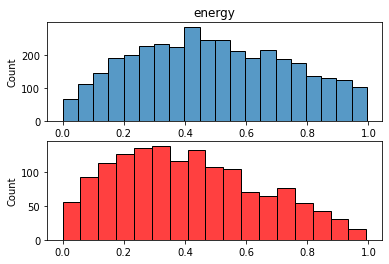

In [64]:
create_comparison_histograms("energy")

Ttest_indResult(statistic=4.390956323346331, pvalue=1.1701874238304686e-05)
MannwhitneyuResult(statistic=2902697.5, pvalue=3.719777493844847e-05)


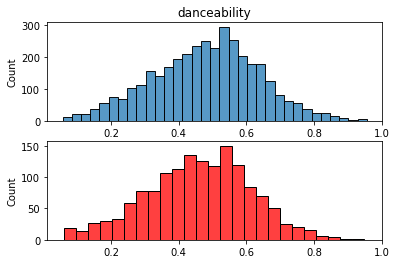

In [65]:
create_comparison_histograms("danceability")

Ttest_indResult(statistic=14.695535469877498, pvalue=1.2019284424851057e-46)
MannwhitneyuResult(statistic=3291640.0, pvalue=2.695717816414336e-34)


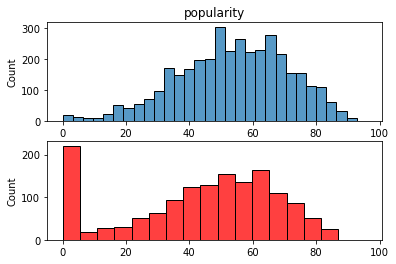

In [66]:
create_comparison_histograms("popularity", data_source="meta")

Ttest_indResult(statistic=1.3509693135447318, pvalue=0.1767973591080596)
MannwhitneyuResult(statistic=2746193.5, pvalue=0.3838845797749164)


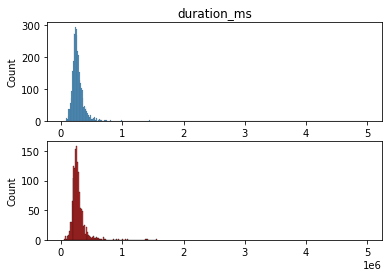

In [67]:
create_comparison_histograms("duration_ms", data_source="meta")

Ttest_indResult(statistic=1.568945623102824, pvalue=0.11677949440975288)
MannwhitneyuResult(statistic=2794315.0, pvalue=0.06132745377443589)


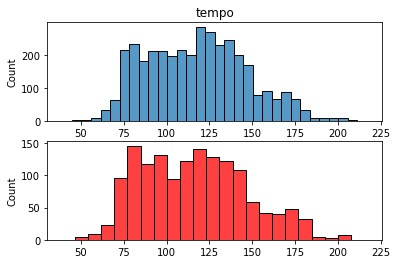

In [68]:
create_comparison_histograms("tempo")